In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

data_frame = pd.read_csv('IRIS.csv')
data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Removing Duplicate Values
data_frame.duplicated()
data_frame.drop_duplicates(inplace=True)
data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Figure size 10000x5000 with 0 Axes>

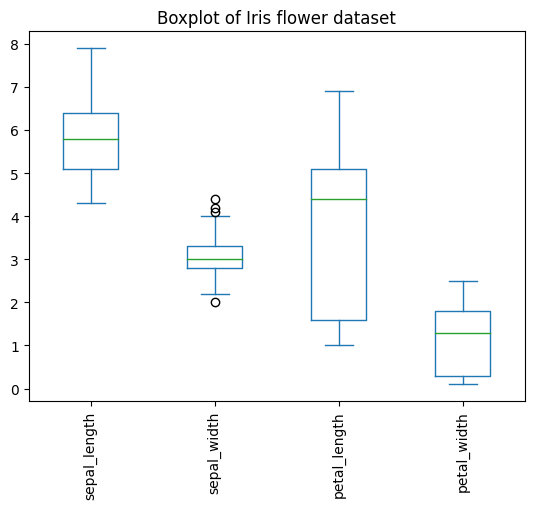

In [4]:
#Outlier Visualization
fig = plt.figure(figsize=(100, 50))
data_frame.plot.box(title='Boxplot of Iris flower dataset', rot=90)
plt.show()

<AxesSubplot: xlabel='sepal_width'>

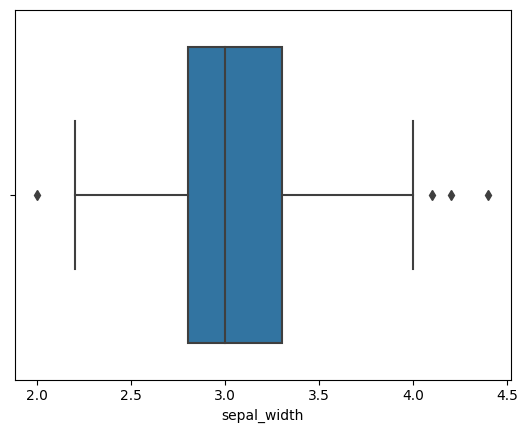

In [5]:
sn.boxplot(x = data_frame['sepal_width'])

In [6]:
#Assigning Nan to outliers
input_var = data_frame['sepal_width']
q75, q25 = np.percentile(input_var, [75, 25])
inter_quartile_range = q75 - q25
max_value = q75 + (1.5 * inter_quartile_range)
min_value = q25 - (1.5 * inter_quartile_range)
data_frame.loc[data_frame['sepal_width'] < min_value, 'sepal_width'] = np.nan
data_frame.loc[data_frame['sepal_width'] > max_value, 'sepal_width'] = np.nan
data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data_frame.isna().sum().any()
data_frame.isna().sum()

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#Removing null values
data_frame.dropna()
data_frame.dropna(axis=0)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Figure size 10000x5000 with 0 Axes>

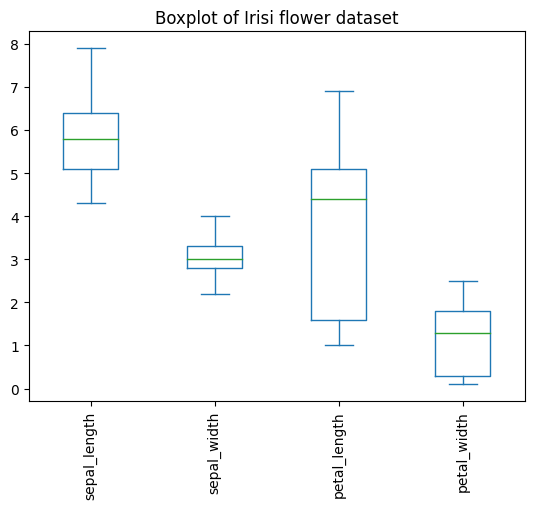

In [9]:
#Resetting index after removing null values
data_frame.dropna().reset_index(drop=True)
data_frame

#Visualize again after removing outliers
fig = plt.figure(figsize=(100, 50))
data_frame.plot.box(title='Boxplot of Irisi flower dataset', rot=90)
plt.show()

<AxesSubplot: xlabel='sepal_width'>

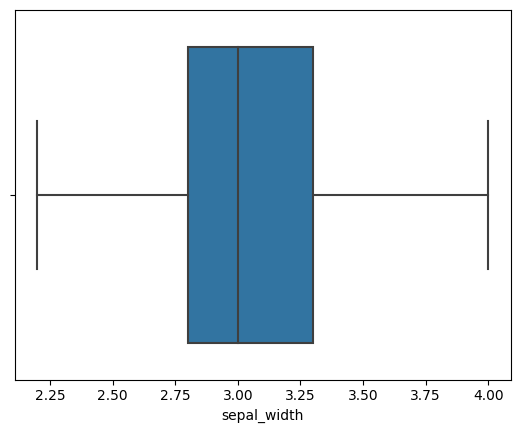

In [10]:
sn.boxplot(x = data_frame['sepal_width'])

In [11]:
#Defining Input and Targer variables
target_var = data_frame.iloc[:, 4].values
target_var

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
    

In [12]:
input_var = data_frame.iloc[:, 1:4]
input_var

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [13]:
#Standardization by eliminating mean and scaling (for data compatibility)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_var)
new_data = pd.DataFrame(data = scaled_data, columns=input_var.columns)

imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(new_data)
new_data = pd.DataFrame(data=imputed_data, columns=new_data.columns)

In [14]:
#KNN | K-Nearest Neighbor
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(new_data, target_var, test_size=0.25,)

#Training the classifier
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
Classifier.fit(train_X, train_y)



KNeighborsClassifier(metric='euclidean')

In [15]:
from sklearn.metrics import accuracy_score
test_prediction = Classifier.predict(test_X)
test_accuracy = accuracy_score(test_y, test_prediction)
test_accuracy

1.0

In [16]:
train_prediction = Classifier.predict(train_X)
train_accuracy = accuracy_score(train_y, train_prediction)
train_accuracy

0.9636363636363636

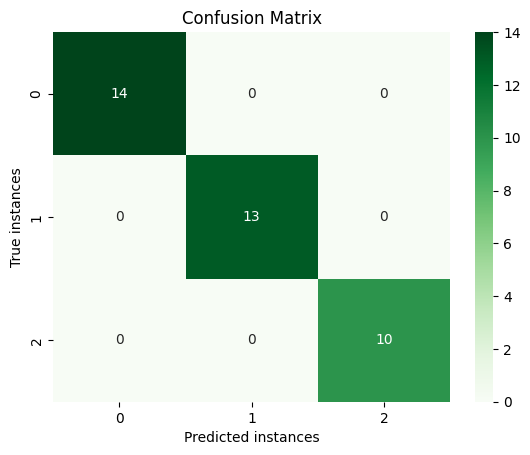

In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_y, test_prediction)

#creating a heatmap to visualize matrix
sn.heatmap(matrix, annot=True, cmap="Greens")

#setting labels
plt.xlabel("Predicted instances")
plt.ylabel("True instances")
plt.title("Confusion Matrix")

plt.show()

In [22]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(test_y, test_prediction, output_dict=True)

report_df = pd.DataFrame(report).transpose()
print("Classification Report")
print(report_df)


Classification Report
                 precision  recall  f1-score  support
Iris-setosa            1.0     1.0       1.0     14.0
Iris-versicolor        1.0     1.0       1.0     13.0
Iris-virginica         1.0     1.0       1.0     10.0
accuracy               1.0     1.0       1.0      1.0
macro avg              1.0     1.0       1.0     37.0
weighted avg           1.0     1.0       1.0     37.0


In [ ]:
#To make a prediction to new data....

# new_data = [[data]]

# predictions = Classifier.predict(new_data)
# print(predictions)